In [1]:
from unstructured.partition.pdf import partition_pdf

/home/rajeev-kumar/Desktop/Multimodal-summerizer/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
raw_data=partition_pdf(
    filename="/home/rajeev-kumar/Desktop/Multimodal-summerizer/data/air_pollution.pdf",
    strategy='hi_res',
    extract_images_in_pdf=True,
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=False,
    extract_image_block_output_dir="extracted_data"
)

In [14]:
raw_data

In [15]:
for element in raw_data:
    print(type(element))
    break

<class 'unstructured.documents.elements.Text'>


In [16]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]
Table=[]
Image=[]

for element in raw_data:
  if "unstructured.documents.elements.Image" in str(type(element)):
            Image.append(str(element))
  elif "unstructured.documents.elements.Table" in str(type(element)):
            Table.append(str(element))
  elif "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))





In [17]:
Table

["Major Sources Health Hazards Pollutants Sulphur dioxide SO2 is a corrosive gas which may remain in the atmosphere It reacts with moisture in eyes, for periods up to several weeks. It accounts for about 18% of all air pollution. It is estimated that annually 65 million form strong irritating acid. tones of SO2 enter the atmosphere as a result of man's"]

In [18]:
Image

['                                                                                         ',
 '   activities, primarily from the combustion of fossil fuels. Of            these, coal is by far the greatest contributor. In the United                  States, it is estimated that almost 60% of SO2 emission are            the  result  of  coal-fired  power  stations.  It  is  harmful  to                  human  health  and  building  materials  and  is  a  major               contributor to acid rain.            It  can  increase  the  likelihood  of     Nitrogen oxides  Nitrogen oxides (NOx) are a group of gases made up of   varying  amounts  of  oxygen  and  nitrogen  molecules.   respiratory problems, as it inflames   Nitrogen  oxide  and  dioxide  are  the  two  gases  produced  the  lining  of  the  lungs,  and  can   when fossil fuels are burned at high temperatures, but it can  reduce immunity to lung infections.     also be formed naturally by lightning strikes. Most of the   It 

In [19]:
NarrativeText

['AIR POLLUTION.',
 'PAPER NAME: - ENVIRONMENTAL GEOGRAPHY SUBJECT: - GEOGRAPHY SEMESTER: - M.A. –IV PAPER CODE: - (GEOG. 403) UNIVERSITY DEPARTMENT OF GEOGRAPHY, DR. SHYMA PRASAD MUKHERJEE UNIVERSITY, RANCHI.',
 'The air we breathe is an essential ingredient for our wellbeing and a healthy life. Unfortunately, air has been polluted. There is no doubt that air pollution existed in ancient times, but it was much less severe and less widespread than today. Three factors account for this, (i) less human population, (ii) small consumption per person and (iii) very basic types of materials used. Today, however, it has reached massive proportions and threatens to change the global environment. According to Mishra (2003) rapid growth in urban population, increasing industrialization, and rising demands for energy and motor vehicles are the worsening air pollution levels. He added other factors, such as poor environmental regulation, less efficient technology of production, congested roads, an

In [20]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain.chat_models import init_chat_model

In [21]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [22]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY

In [23]:
model=init_chat_model("gemini-2.5-flash", model_provider="google_genai")

In [24]:
res=model.invoke("Hello, world!")
res.content

"Hello there! It's great to hear from you. How can I help you today?"

###Table summery

In [25]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [26]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [27]:
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [28]:
table_summaries = []
table_summaries = summarize_chain.batch(Table, {"max_concurrency": 5})
table_summaries

['Concise summary of Sulphur dioxide (SO2) as a major air pollutant, detailing its health hazards (corrosive, eye irritation, acid formation), environmental impact (atmospheric persistence, contribution to air pollution), and anthropogenic sources (annual emissions).']

###Text summery

In [29]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """

In [30]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [31]:
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [32]:
len(NarrativeText)

43

In [34]:
import time

text_summaries = []
batch_size = 5  # safely under your quota
for i in range(0, len(NarrativeText), batch_size):
    batch = NarrativeText[i:i+batch_size]
    results = summarize_chain.batch(batch, {"max_concurrency": 8})
    text_summaries.extend(results)
    
    # wait 60 seconds if more batches are left
    if i + batch_size < len(NarrativeText):
        print("Waiting to respect API quota...")
        time.sleep(60)


Waiting to respect API quota...
Waiting to respect API quota...
Waiting to respect API quota...
Waiting to respect API quota...
Waiting to respect API quota...
Waiting to respect API quota...
Waiting to respect API quota...
Waiting to respect API quota...


In [35]:
text_summaries

['This text discusses air pollution.',
 'Summary of a university paper: "Environmental Geography" (GEOG. 403) for M.A. IV semester in Geography, offered by Dr. Shyama Prasad Mukherjee University, Ranchi.',
 "This text summarizes air pollution, contrasting its less severe historical presence with today's massive scale. It details worsening factors like rapid urban growth, industrialization, and energy/vehicle demands, alongside poor regulation and inefficient technology. Both man-made sources (tobacco smoke, industrial emissions, vehicles, power generation) and natural sources (fires, waste disposal) are identified. The primary root cause is attributed to the large and growing global population, particularly in developing countries, driving increased fossil fuel consumption. Transportation (50-70%) and heavy industry (15-25%) are highlighted as major contributors to air pollution and its associated health impacts.",
 'World Health Organization (WHO) definition of air pollution, emphasiz

###Image Summary

In [36]:
import base64
from langchain_core.messages import HumanMessage,SystemMessage

In [37]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [38]:
def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = init_chat_model("gemini-2.5-flash", model_provider="google_genai")

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [39]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    i=0
    for img_file in sorted(os.listdir(path)):
        if i==8:
            i=0
            print("Waiting to respect API quota...")
            time.sleep(60)

            
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))
            i=i+1


    return img_base64_list, image_summaries

In [40]:
fpath="/home/rajeev-kumar/Desktop/Multimodal-summerizer/notebook/extracted_data"

In [41]:
img_base64_list, image_summaries = generate_img_summaries(fpath)


In [42]:
image_summaries

['A diagram classifying air pollutants into primary and secondary types. It illustrates various sources of primary pollutants, including factories, vehicle exhausts, power generation, agriculture, wildfires, and aeroplanes, listing examples like Carbon Monoxide (CO) and Sulphur Dioxide (SO2). The diagram also shows how primary pollutants interact to form secondary pollutants such as Sulphuric Acid (H2SO4) and Ozone (O3) in the atmosphere.',
 'A concise table summarizing various air pollutants, including nitrogen oxides, carbon oxides, particulates, hydrocarbons, oxidants, acid deposition, and synthetic compounds. It details the description, sources, and health and environmental impacts of each pollutant.',
 'A table summarizing Sulphur dioxide (SO2) as a major air pollutant, detailing its sources as a corrosive gas from human activity, and its health hazards including forming irritating acid in eyes and lungs.']

In [43]:
img_base64_list

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANSBLcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooA4t9D0/UfG2ox3FurKII5P+BEnJrS/4QrQ/wDnzWktB/xXepf9ekX8zXQ4PrW05yVlfojKEU73Of8A+EK0P/nzWj/hCtD/AOfNa6DB9aMH1qPaS7l8kexz/wDwhWh/8+a0f8IVof8Az5rXQYPrRg+tHtJdw5

###Creating a MultiVector Retriever

In [47]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryByteStore
from langchain_chroma import Chroma
from langchain_core.documents import Document
# from langchain_ import OpenAIEmbeddings
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [48]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """

    # Initialize the storage layer
    store = InMemoryByteStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )


    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      summary_docs = [
              Document(page_content=s, metadata={id_key: doc_ids[i]})
              for i, s in enumerate(doc_summaries)
          ]

      retriever.vectorstore.add_documents(summary_docs)
      retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # Add texts, tables, and images
    # Check that text_summaries is not empty before adding
    if text_summaries:
        add_documents(retriever, text_summaries, texts)
    # Check that table_summaries is not empty before adding
    if table_summaries:
        add_documents(retriever, table_summaries, tables)
    # Check that image_summaries is not empty before adding
    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever

In [51]:


vectorstore = Chroma(
    collection_name="mm_rag", embedding_function=GoogleGenerativeAIEmbeddings(model='models/embedding-001')
)

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    Text,
    table_summaries,
    Table,
    image_summaries,
    img_base64_list,
)

In [52]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x70ad0c2bf510>, docstore=<langchain_core.stores.InMemoryByteStore object at 0x70ad0c1a3010>, search_kwargs={})

In [57]:
res=retriever_multi_vector_img.vectorstore.similarity_search("health hazard of sulphur dioxide")

In [58]:
res

[Document(id='602af792-6791-4849-a03d-681633dcde31', metadata={'doc_id': '74c9c6ca-8477-4984-8b69-828a33f68ef0'}, page_content='Air pollution causes acute and chronic health effects on human health, impacting various systems and organs.'),
 Document(id='9a673913-edbf-4aaa-ab31-63d0643fa860', metadata={'doc_id': 'dbab8099-7cb7-4877-8fb7-c5591b4b609c'}, page_content='This text describes a wide range of adverse health effects, from minor upper respiratory irritation to severe chronic respiratory and heart diseases, lung cancer, acute infections, aggravated pre-existing conditions, asthmatic attacks, and premature mortality.'),
 Document(id='b959ca3b-19e1-485d-b19e-3a5d4b5af2ef', metadata={'doc_id': 'e4fc081f-af8e-4e3c-9831-603e8aa9425f'}, page_content='Pollution control equipment.'),
 Document(id='d9b4309d-0e3c-4694-9de7-8bbec3094d0f', metadata={'doc_id': '9ad16fef-5fd6-4bad-806f-4e873c3a6b6b'}, page_content='Concise summary of Sulphur dioxide (SO2) as a major air pollutant, detailing its

In [59]:
import io
import re

from IPython.display import HTML, display
from PIL import Image

In [60]:
def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


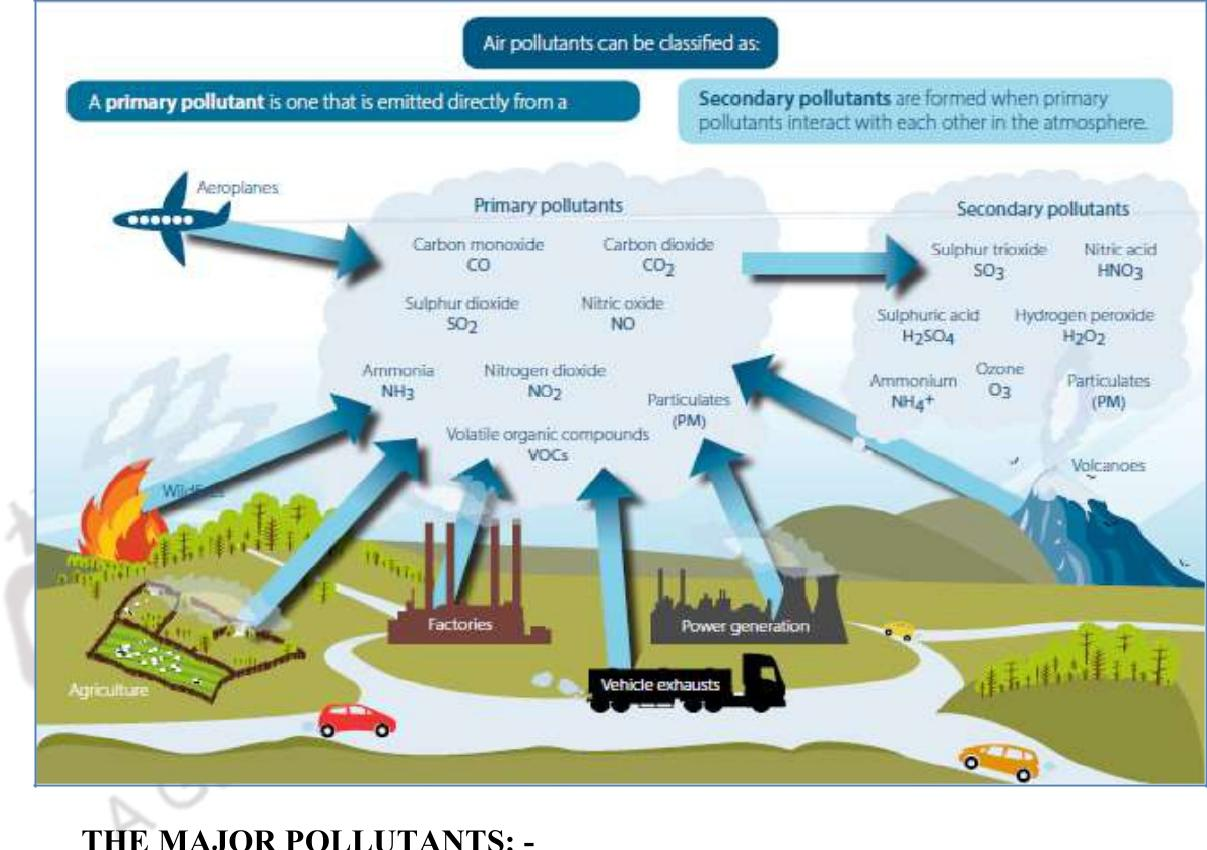

In [62]:
plt_img_base64(img_base64_list[0])

In [64]:
print(image_summaries[0])

A diagram classifying air pollutants into primary and secondary types. It illustrates various sources of primary pollutants, including factories, vehicle exhausts, power generation, agriculture, wildfires, and aeroplanes, listing examples like Carbon Monoxide (CO) and Sulphur Dioxide (SO2). The diagram also shows how primary pollutants interact to form secondary pollutants such as Sulphuric Acid (H2SO4) and Ozone (O3) in the atmosphere.


In [77]:
def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None

In [78]:
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [79]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [81]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

In [82]:
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    """
    #print(data_dict)
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            "You are a helpful assistant.\n"
            "You will be given a mixed info(s) .\n"
            "Use this information to provide relevant information to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]


In [83]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.runnables import RunnableLambda, RunnablePassthrough


In [84]:
def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM
    model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)


    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

In [85]:
rag_chain=multi_modal_rag_chain(retriever_multi_vector_img)

In [87]:
res=rag_chain.invoke("tell me the sources of sulphur dioxide")

In [90]:
from IPython.display import display,Markdown

In [91]:
display(Markdown(res))

Based on the provided text, the sources of sulphur dioxide are:

*   **Man's activities (anthropogenic sources):** It is estimated that annually 65 million tons of SO2 enter the atmosphere as a result of man's activities.
*   **Natural and anthropogenic sources:** The text also generally states that pollutants are "produced by natural and anthropogenic sources."

In [92]:
rag_chain

{
  context: MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x70ad0c2bf510>, docstore=<langchain_core.stores.InMemoryByteStore object at 0x70ad0c1a3010>, search_kwargs={})
           | RunnableLambda(split_image_text_types),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)
| ChatGoogleGenerativeAI(model='models/gemini-2.5-flash', google_api_key=SecretStr('**********'), temperature=0.0, max_retries=2, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x70acfc1cfb50>, default_metadata=(), model_kwargs={})
| StrOutputParser()